In [1]:
import matplotlib.pyplot as plt
import yaml
import os

In [2]:
def parse_experiment_output(experiment_file_path): # returns (throughput, average_latency) tuple
    with open(experiment_file_path, 'r') as file:
        lines = file.readlines()
    throughput = None
    latency = None
    for line in lines:
        if line.startswith('Throughput:'):
            throughput = float(line.split(': ')[1])
        if line.startswith('Average latency in ms:'):
            latency = float(line.split(': ')[1])
    return throughput, latency

In [3]:
def read_parameters_yaml(parameters_path):
    with open(parameters_path, "r") as file:
        return yaml.safe_load(file)

In [4]:
def get_experiment_group_values(x_value_calc_func, experiment_group_path): # x_value_calc_func gets a directory and calculates the x value
    experiment_paths = [ f.path for f in os.scandir(experiment_group_path) if f.is_dir() ]
    x_vals = []
    throughputs = []
    latencies = []
    for experiment_path in experiment_paths:
        x_vals.append(x_value_calc_func(experiment_path))
        experiment_throughputs = []
        experiment_latencies = []
        for i in [1, 2, 3]:
            exp = os.path.join(experiment_path, "experiment_{exp_num}.txt".format(exp_num=i))
            th, lat = parse_experiment_output(exp)
            experiment_throughputs.append(th)
            experiment_latencies.append(lat)
        throughputs.append(experiment_throughputs)
        latencies.append(experiment_latencies)
    x_vals, throughputs, latencies = zip(*sorted(zip(x_vals, throughputs, latencies)))        
    return x_vals, throughputs, latencies

In [5]:
def plot(x_vals, throughputs, latencies, x_label, is_x_log_scale):
    throughput_means = [sum(th) / len(th) for th in throughputs]
    throughput_stdevs = [((sum((yi - y_mean) ** 2 for yi in y)) / len(y)) ** 0.5 for y, y_mean in zip(throughputs, throughput_means)]
    latency_means = [sum(lat) / len(lat) for lat in latencies]
    latency_stdevs = [((sum((yi - y_mean) ** 2 for yi in y)) / len(y)) ** 0.5 for y, y_mean in zip(latencies, latency_means)]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.set_xlabel(x_label, fontsize=12, fontweight='bold')
    ax1.set_ylabel('Througput (ops/sec)', fontsize=12, fontweight='bold')
    ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    ax1.errorbar(x_vals, throughput_means, yerr=throughput_stdevs, fmt='-o', capsize=5, color='tab:blue', ecolor='tab:red', elinewidth=1, markeredgewidth=1)
    if is_x_log_scale:
        ax1.set_xscale('log')
    
    ax2.set_xlabel(x_label, fontsize=12, fontweight='bold')
    ax2.set_ylabel('Latency (ms)', fontsize=12, fontweight='bold')
    ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    ax2.errorbar(x_vals, latency_means, yerr=latency_stdevs, fmt='-o', capsize=5, color='tab:blue', ecolor='tab:red', elinewidth=1, markeredgewidth=1)
    if is_x_log_scale:
        ax2.set_xscale('log')
    
    plt.tight_layout()

## Max Request Experiments

In [6]:
experiment_group_path = "/Users/aminst/Documents/oblishard/experiments/max_requests_experiments"
def max_request_calc_func(exp_path):
    parameters_path = os.path.join(exp_path, "parameters.yaml")
    params = read_parameters_yaml(parameters_path)
    return params["max-requests"]

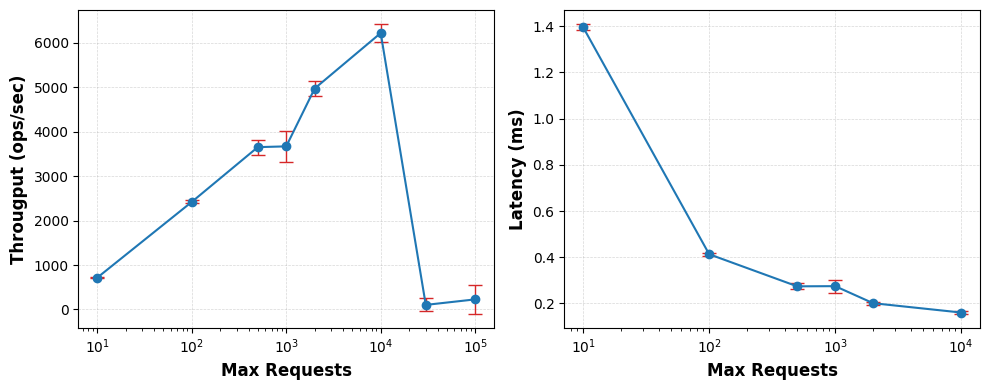

In [7]:
x_vals, ths, latencies = get_experiment_group_values(max_request_calc_func, experiment_group_path)
plot(x_vals, ths, latencies, "Max Requests", True)

## Tree Height Experiments

In [8]:
experiment_group_path = "/Users/aminst/Documents/oblishard/experiments/tree_height_experiments"
def tree_height_calc_func(exp_path):
    parameters_path = os.path.join(exp_path, "parameters.yaml")
    params = read_parameters_yaml(parameters_path)
    return params["tree-height"]

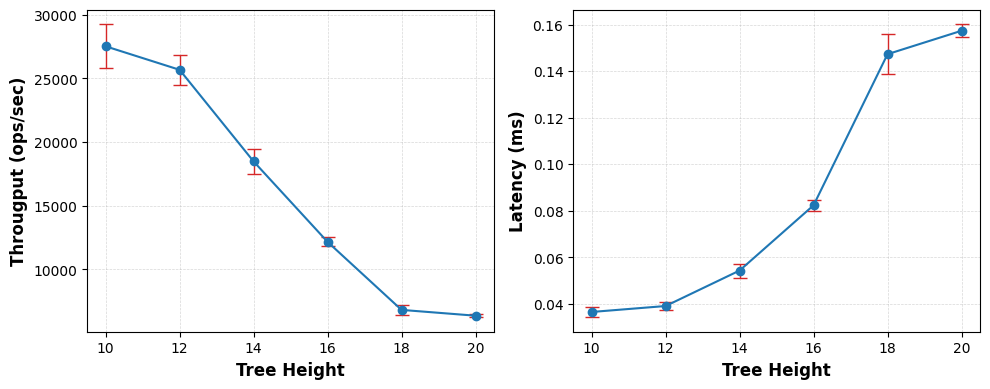

In [9]:
x_vals, ths, latencies = get_experiment_group_values(tree_height_calc_func, experiment_group_path)
plot(x_vals, ths, latencies, "Tree Height", False)

## Dummy Block Count (S) Experiments

In [13]:
experiment_group_path = "/Users/aminst/Documents/oblishard/experiments/s_experiments"
def s_calc_func(exp_path):
    parameters_path = os.path.join(exp_path, "parameters.yaml")
    params = read_parameters_yaml(parameters_path)
    return params["S"]

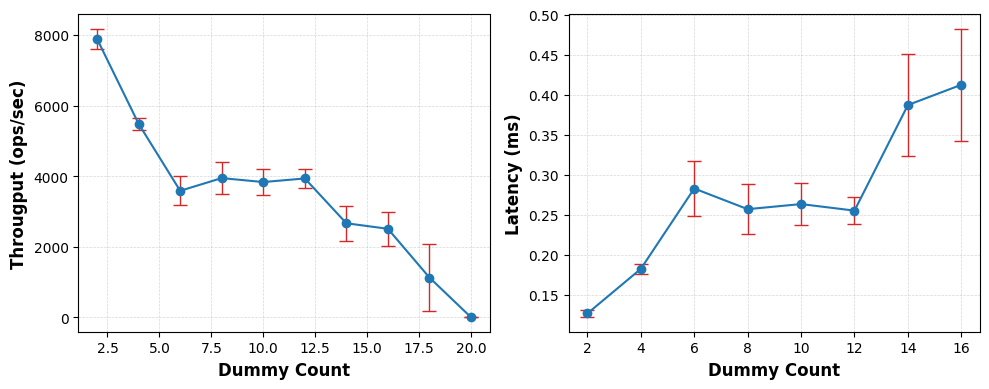

In [14]:
x_vals, ths, latencies = get_experiment_group_values(s_calc_func, experiment_group_path)
plot(x_vals, ths, latencies, "Dummy Count", False)

## Block Size Experiments

In [19]:
experiment_group_path = "/Users/aminst/Documents/oblishard/experiments/block_size_experiments"
def block_size_calc_func(exp_path):
    parameters_path = os.path.join(exp_path, "parameters.yaml")
    params = read_parameters_yaml(parameters_path)
    return params["block-size"]

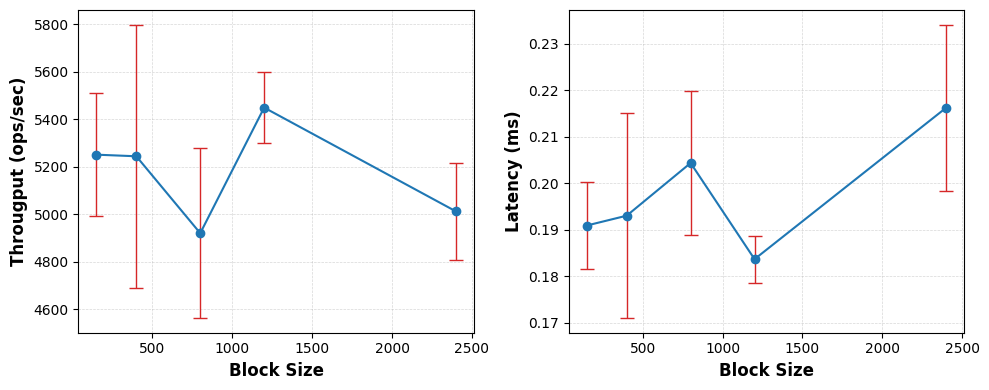

In [20]:
x_vals, ths, latencies = get_experiment_group_values(block_size_calc_func, experiment_group_path)
plot(x_vals, ths, latencies, "Block Size", False)

## Epoch Experiments

In [32]:
experiment_group_path = "/Users/aminst/Documents/oblishard/experiments/epoch_experiments"
def epoch_size_calc_func(exp_path):
    parameters_path = os.path.join(exp_path, "parameters.yaml")
    params = read_parameters_yaml(parameters_path)
    return params["epoch-time"]

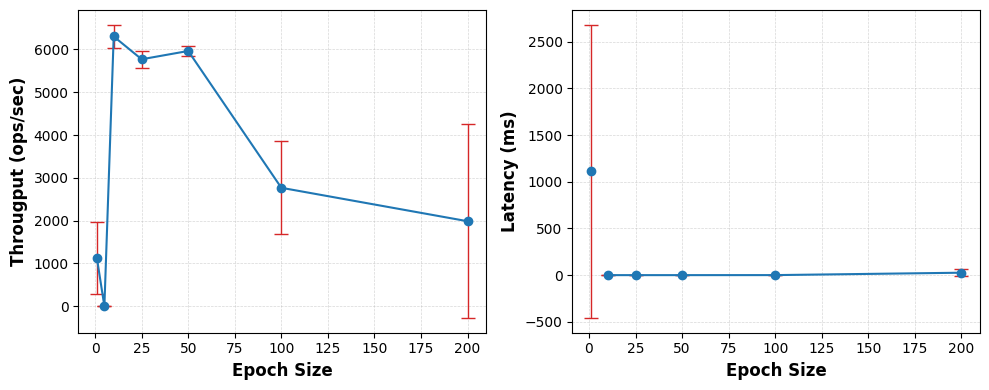

In [33]:
x_vals, ths, latencies = get_experiment_group_values(epoch_size_calc_func, experiment_group_path)
plot(x_vals, ths, latencies, "Epoch Size", False)